<img src='../images/ga_logo_large.png' style="display: block; margin-left: auto; margin-right: auto;">

---
## **Project 4: Stocks and Portfolios**

---
### **EDA and Visualizations: User Data**

In [103]:
# modules needed for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other modules
from datetime import datetime as dt

In [105]:
# read in clean file
file_path = 'https://raw.githubusercontent.com/Aditya-Mahajan-02/Stocks_and_Portfolios/refs/heads/navi/data/clean_data/stocks-clean-data.csv'

stocks = pd.read_csv(file_path)

# check dimensions and first few rows
print(stocks.shape)
stocks.head()

(26308, 11)


,trading_volume,volume_weighted,open_price,close_price,highest_price,lowest_price,timestamp,transactions,price_range,volatility,price_change_percentage
0,119605127.0,233.6043,234.45,230.76,236.85,227.76,1729396800000,1743438,9.09,3.69,-1.573896
1,358320463.0,230.2414,224.50,235.00,237.49,221.33,1728187200000,5563002,16.16,10.50,4.677060
2,411269719.0,227.1824,227.34,226.80,233.00,223.02,1726977600000,5835500,9.98,0.54,-0.237530
3,737776128.0,223.8730,220.82,228.20,233.09,213.92,1725768000000,7473637,19.17,7.38,3.342089
4,374000504.0,225.6062,226.76,220.82,232.92,217.48,1724558400000,5682718,15.44,5.94,-2.619510


See all column names:

In [85]:
stocks.columns

Index(['trading_volume', 'volume_weighted', 'open_price', 'close_price',
       'highest_price', 'lowest_price', 'timestamp', 'transactions',
       'price_range', 'volatility', 'price_change_percentage', 'date',
       'hour_minute'],
      dtype='object')

In [87]:
# check nulls and data types
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26308 entries, AAPL to NWS
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trading_volume           26308 non-null  float64       
 1   volume_weighted          26308 non-null  float64       
 2   open_price               26308 non-null  float64       
 3   close_price              26308 non-null  float64       
 4   highest_price            26308 non-null  float64       
 5   lowest_price             26308 non-null  float64       
 6   timestamp                26308 non-null  int64         
 7   transactions             26308 non-null  int64         
 8   price_range              26308 non-null  float64       
 9   volatility               26308 non-null  float64       
 10  price_change_percentage  26308 non-null  float64       
 11  date                     26308 non-null  datetime64[ns]
 12  hour_minute              26308 non-n

No missing data.  All data types look good.

Use the `timestamp` column to create two new columns: `date` and `hour_minute`.

In [113]:
# convert to seconds then transform to date time object
stocks['date'] = stocks['timestamp'].map(lambda x: dt.fromtimestamp(x/1000))

stocks['hour_minute'] = stocks['date'].map(lambda x: x.strftime('%H:%M'))

In [115]:
# confirm
print(stocks.shape)
stocks.tail()

(26308, 14)


,trading_volume,volume_weighted,open_price,close_price,highest_price,lowest_price,timestamp,transactions,price_range,volatility,price_change_percentage,symbol,date,hour_minute
26303,6153143.0,18.1118,18.00,18.44,18.73,17.470,1671339600000,67214,1.260,0.44,2.444444,NWS,2022-12-18,00:00
26304,10275168.0,18.5034,19.40,18.07,19.40,17.845,1670130000000,102374,1.555,1.33,-6.855670,NWS,2022-12-04,00:00
26305,7993945.0,18.6242,17.90,19.43,19.67,17.645,1668920400000,87526,2.025,1.53,8.547486,NWS,2022-11-20,00:00
26306,13654984.0,17.5333,17.03,18.17,18.69,15.150,1667707200000,138506,3.540,1.14,6.694069,NWS,2022-11-06,00:00
26307,13034580.0,17.0190,17.34,16.92,17.66,16.200,1666497600000,113603,1.460,0.42,-2.422145,NWS,2022-10-23,00:00


---
### **Functions**
Non-native functions applicable to this notebook are listed in this section.

**Plot histogram and boxplot for a column**

In [276]:
def plot_hist_box(df, col_name, title = None, xlabel = None):
    '''
    This function plots a histogram and a boxplot of a column.
    
    Parameters:
    col_name: string, this is the column's name
    title: string, the plot title.  Default value is a blank string.
    xlabel: string, the x-axis label.  Default value is a blank string.
    
    Return:
    It returns two plots.  A histogram on the left and a boxplot on the right.
    '''

    plt.figure(figsize = (16, 6))

    plot1 = plt.subplot(1, 2, 1)  # for histogram
    plot2 = plt.subplot(1, 2, 2)  # for box plot

    # histogram ---------------------------------------------------------------------------------------------
    plot1.hist(df[col_name], bins = 25, color = '#00bcd4', edgecolor = '#ffffff');
    plot1.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
    plot1.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot1.spines['top'].set_visible(False)
    plot1.spines['right'].set_visible(False)
    plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);
    
    
    # box plot -----------------------------------------------------------------------------------------------
    sns.boxplot(data = df[col_name], ax = plot2, orient = 'h', color = '#00bcd4', medianprops = {'color':'#FFFFFF'});
    plot2.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
    plot2.spines['top'].set_visible(False)
    plot2.spines['left'].set_visible(False)
    plot2.spines['right'].set_visible(False)
    plot2.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

**Plot heatmap for given number of columns**

In [278]:
def plot_heatmap(df, columns):
    '''
    This function plots a heatmap of the number of columns passed in.
    
    Parameters:
    columns: list, a list of columns to plot.
    
    Return:
    It returns a heatmap of the columns.
    '''

    plt.figure(figsize = (12, 12))

    # heatmap setup
    corrs = round(df[columns].corr(), 2)
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask)] = True

    # plot heatmap
    sns.heatmap(corrs,
                square = True,
                annot = True,
                cmap = 'Blues',
                mask = mask,
                vmin = -1,
                vmax = 1);

**Plot Scatter Plots**

In [281]:
def scatter_plots(start, stop):
    plt.figure(figsize = (15, 5))
    
    for idx, symbol in enumerate(tickers[start:stop]):
        
        x = stocks[stocks['symbol'] == symbol]['volume_weighted']
        y = stocks[stocks['symbol'] == symbol]['volatility']
        
        ax = plt.subplot(1, 5, idx+1)
        ax.scatter(x, y, color = '#00bcd4', edgecolors = '#ffffff')
        
        trend = np.polyfit(x, y, 1)
        trend_line = np.poly1d(trend)
        correlation = round(np.corrcoef(x, y)[0, 1], 2)

        ax.plot(x, trend_line(x), color = '#003366', linestyle = '--')
        
        ax.set_title(f'{symbol}:  {correlation}');

---
### **Correlations**

Start with a pairplot to see what's going on at a high level.

<Figure size 1200x1200 with 0 Axes>

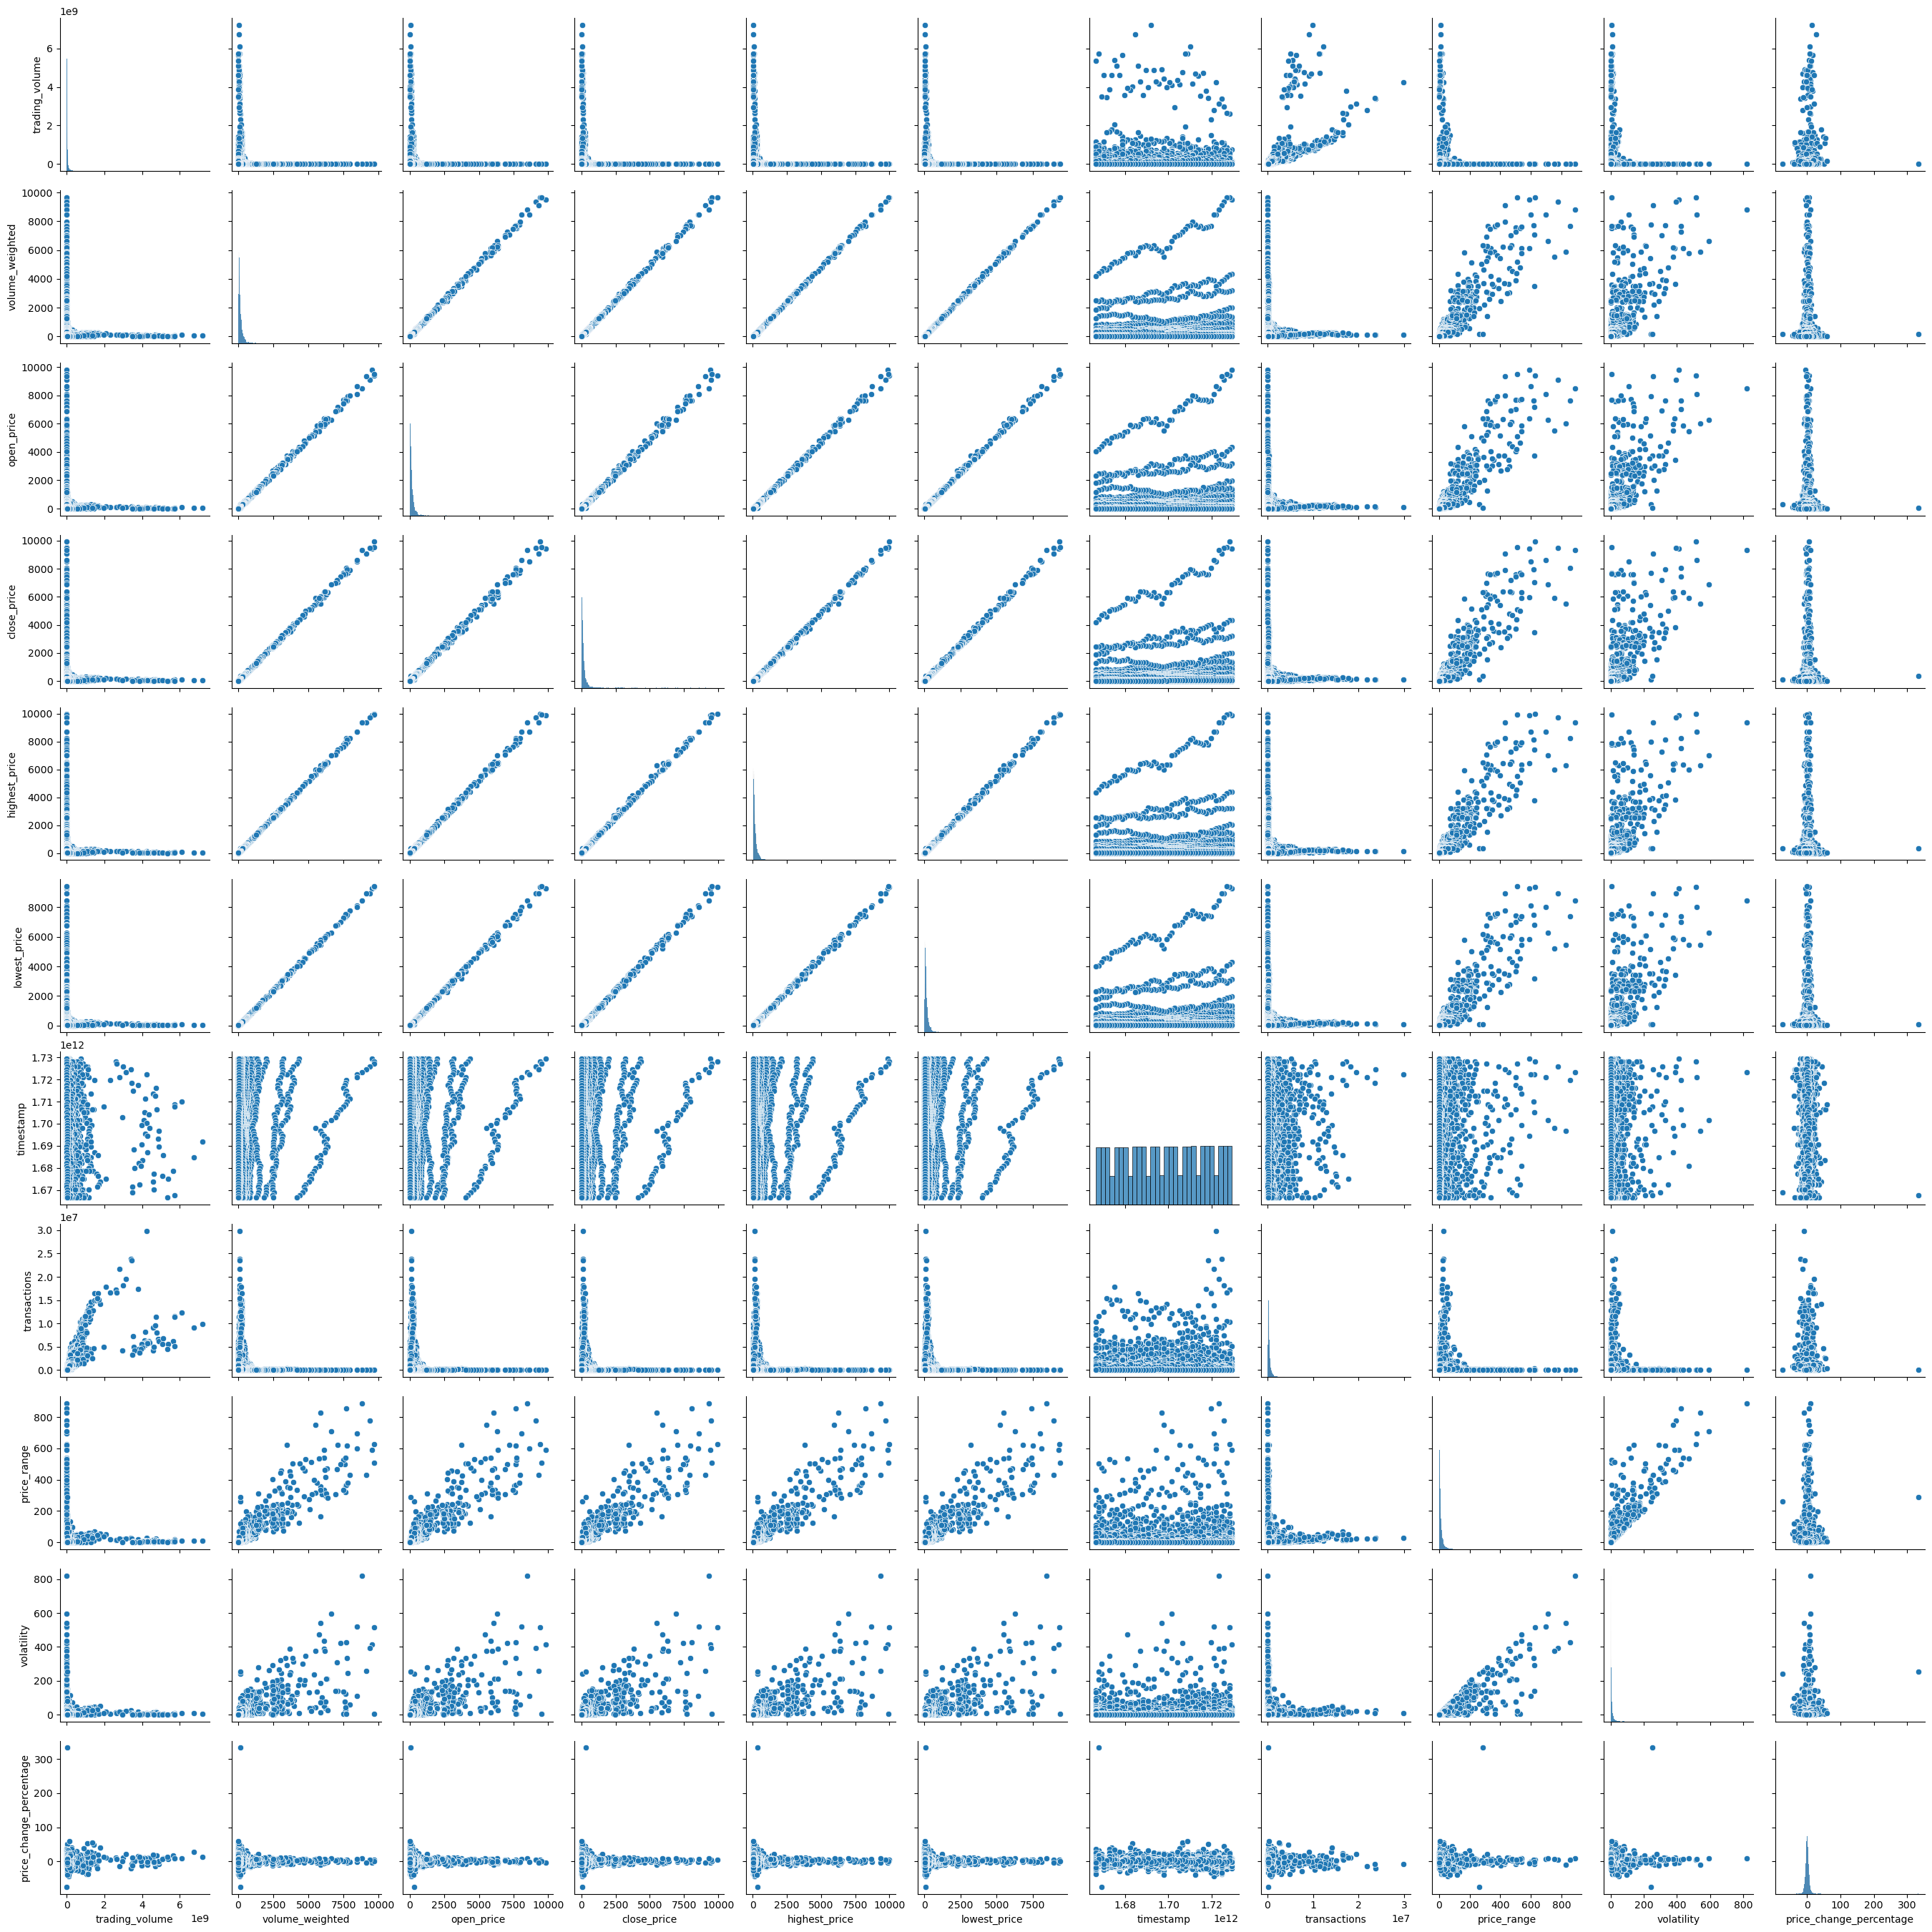

In [121]:
plt.figure(figsize = (12, 12));
sns.pairplot(stocks);
#plt.savefig('../images/stocks_pairplot.png');

There are lots of possible correlations worth exploring.  Let's take a look at some. But first, build a heatmap to see which correlations to prioritize exploring.

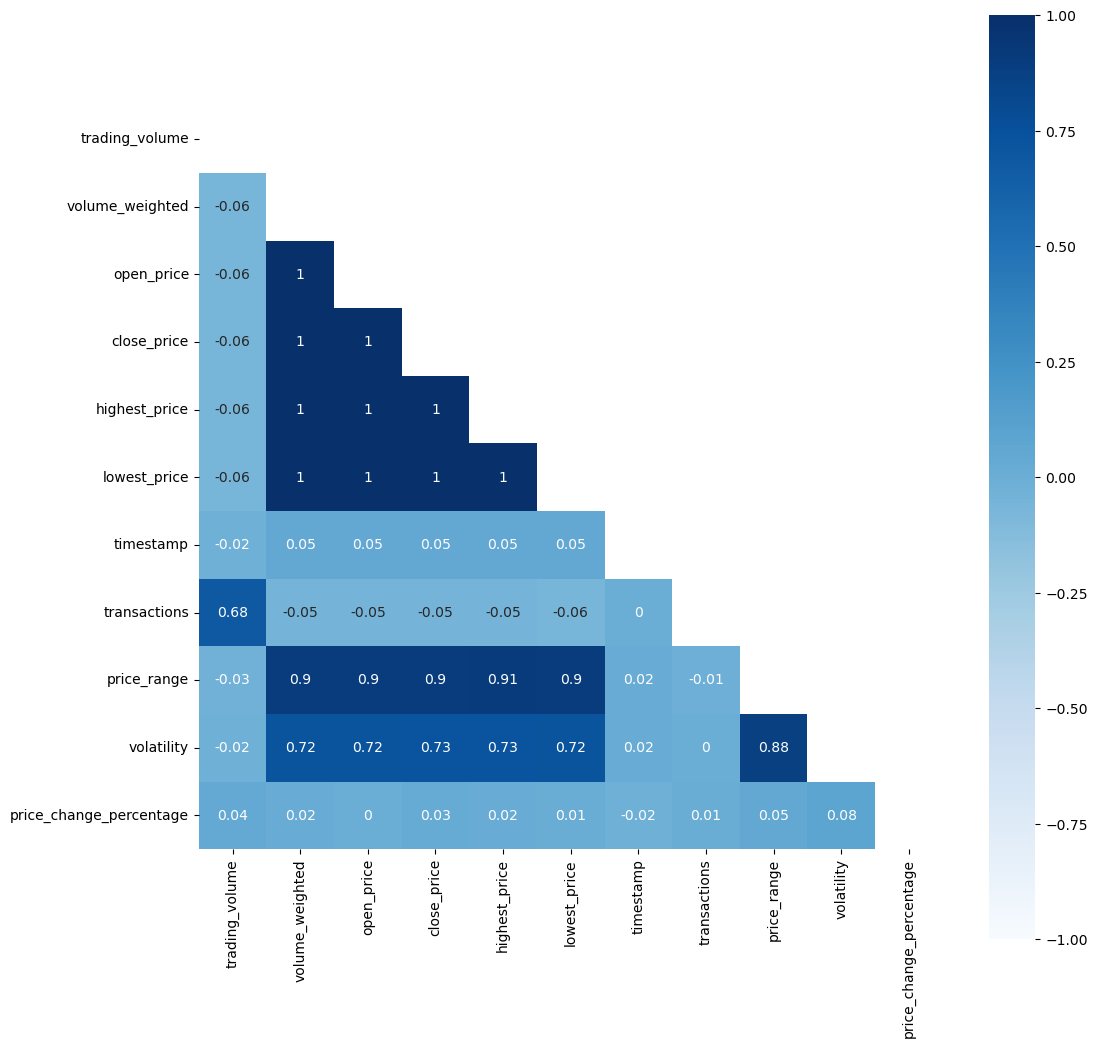

In [283]:
plot_heatmap(stocks, 
             stocks.drop(columns = ['symbol', 'date', 'hour_minute']).columns)
#plt.savefig('../images/stocks_heatmap.png')

Some relationships worth exploring first are `volume_weighted` vs `volatility`, `volume_weighted` vs. `price_range`, and `price_range` vs. `volatility`.

---
**Weighted Volume vs. Volatility**

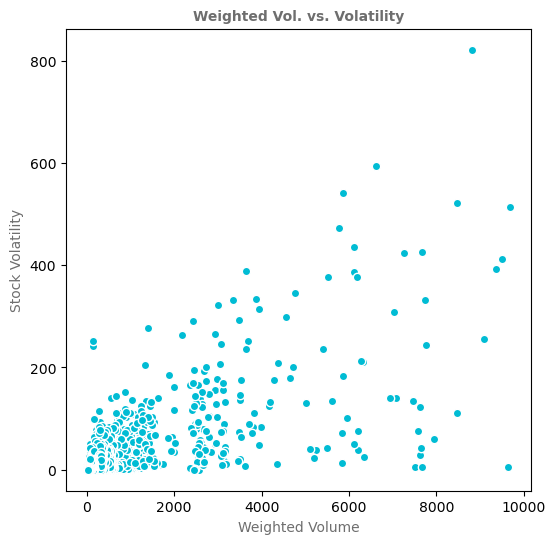

In [285]:
plt.figure(figsize = (6, 6))
plot1 = plt.subplot(1, 1, 1)

plot1.scatter(stocks['volume_weighted'],
              stocks['volatility'],
              color = '#00bcd4',
              edgecolors = '#ffffff')



plot1.set_title('Weighted Vol. vs. Volatility', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot1.set_xlabel('Weighted Volume', color = '#6e6e6e', fontsize = 10)
plot1.set_ylabel('Stock Volatility', color = '#6e6e6e', fontsize = 10);

#plt.savefig('../images/scatterplot_vol_vs_volatility.png')

The chart highlights the positive correlation between both variables.  Higher trading volume seems to increase price swings in stocks (volatility).

**Column**: `volume_weighted`

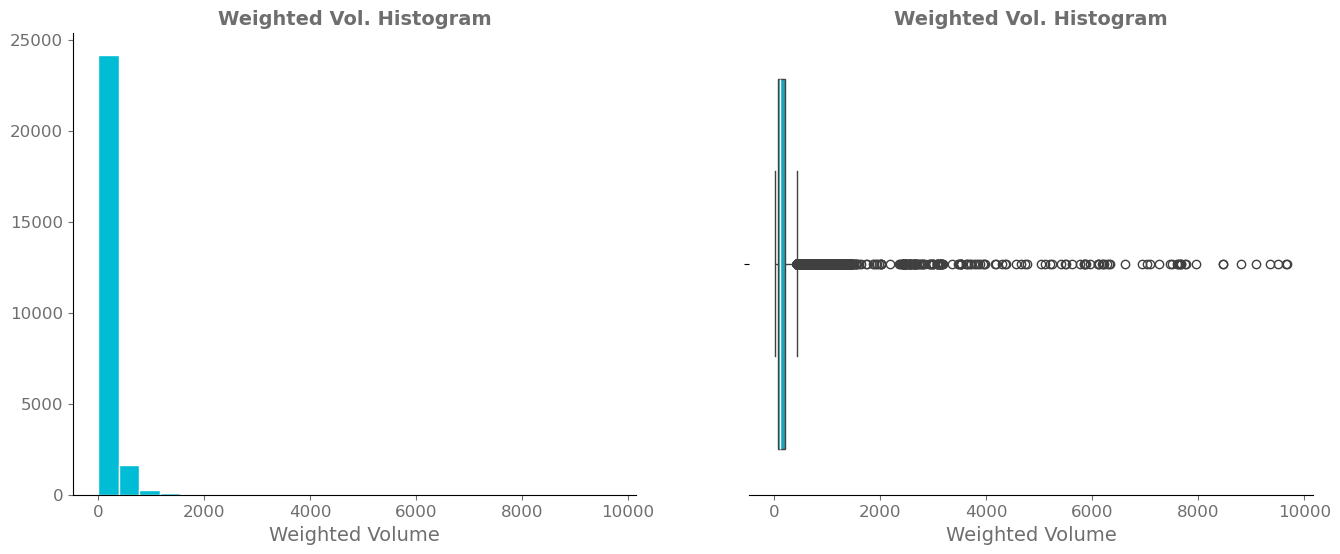

In [170]:
plot_hist_box(stocks, 'volume_weighted',
              title = 'Weighted Vol. Histogram',
              xlabel = 'Weighted Volume')

plt.savefig('../images/hist_&_boxplot_volume_weighted.png')

In [177]:
stocks['volume_weighted'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
volume_weighted,26308.0,184.0,384.0,6.0,60.0,109.0,205.0,9679.0


The `volume_weighted` data is characterized by lots of outliers as evidenced by the charts and stats displayed above.

**Column**: `volatility`

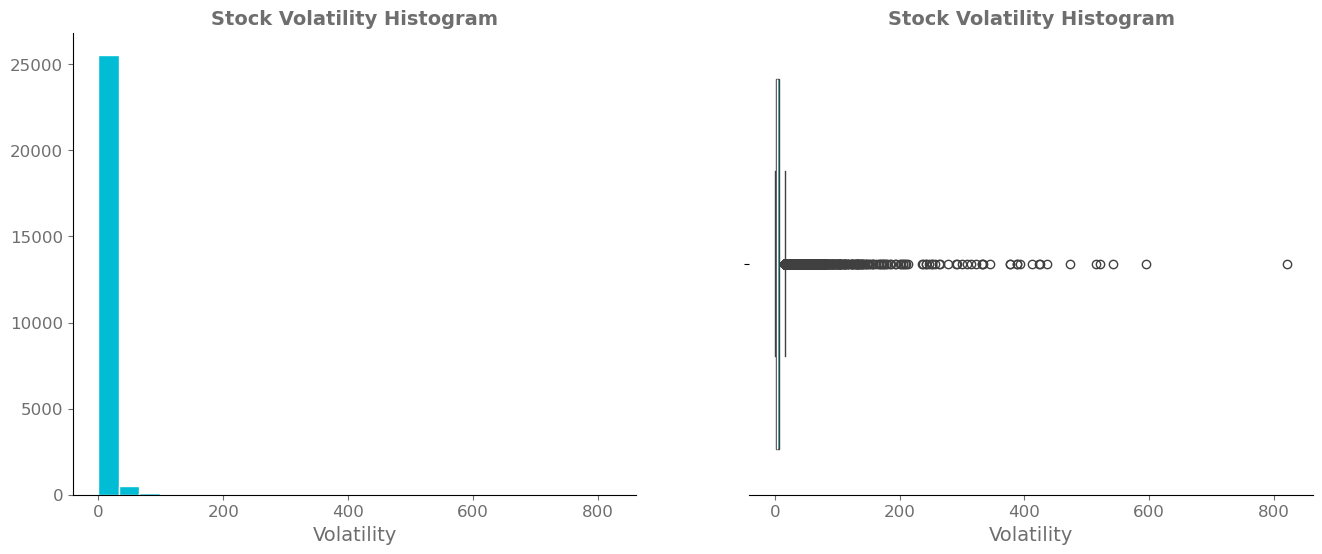

In [168]:
plot_hist_box(stocks, 'volatility',
              title = 'Stock Volatility Histogram',
              xlabel = 'Volatility')

plt.savefig('../images/hist_&_boxplot_volatility.png')

In [179]:
stocks['volatility'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
volatility,26308.0,7.0,18.0,0.0,1.0,3.0,7.0,821.0


The `volatility` data is characterized by even more outliers as evidenced by the charts and stats displayed above.